# Predicting the Stock Market Using ML

The aim of this project is to build a system that can predict tomrrows price of the SP500, based off yesterday's price.
We will also backtest this over 20 years to test the accuracy of our model

## 1. Importing the Data

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
# We can query this ticker, using the maximum period
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,0,0
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,3961940000,0,0
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,0,0


This produces a DataFrame with the price of the SP500 for each day since the 1950. In particular, we have the Open and Close, Low and High, Volume traded as well as Dividends and Stock Splits - which we will get rid off for this model.

In [4]:
# We can see the type of data frame we have 
sp500.index

DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',
               '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12',
               '1950-01-13', '1950-01-16',
               ...
               '2022-05-18', '2022-05-19', '2022-05-20', '2022-05-23',
               '2022-05-24', '2022-05-25', '2022-05-26', '2022-05-27',
               '2022-05-31', '2022-06-01'],
              dtype='datetime64[ns]', name='Date', length=18222, freq=None)

## 2. Preprocessing

In [6]:
# Remove unwanted columns

del sp500["Dividends"]
del sp500["Stock Splits"]

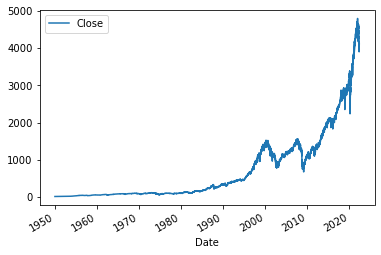

In [5]:
# We visualise the closing price along time i.e the index
sp500.plot.line(y="Close", use_index=True)

Clearly, there were many good points to buy in the long term.

We will now set out Target - what we aim to predict. We could try and figure out the next days absolute value, but ultimately we only care if the stocks I want to buy today will go up tomorrow (so I should buy) or go down (so I should wait).

Therefore, we will predict UP (1) or DOWN (0).

In [9]:
# The shift() method picks the value and -1 takes it one row back
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,3961940000,4158.240234
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902


In [10]:
# We can create a boolean logic to indicate up or down
# We convert this to an integer to apply ML methods on it
sp500["Target"] = (sp500["Tomorrow"] >sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,3961940000,4158.240234,1
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0


Usually a lot of historical data is good. In the markets though, the financial background can change. Therefore we will limt our analysis to start at 1990 (intead of 1950).

In [11]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2022-05-25,3929.590088,3999.330078,3925.030029,3978.729980,4322190000,4057.840088,1
2022-05-26,3984.600098,4075.139893,3984.600098,4057.840088,3961940000,4158.240234,1
2022-05-27,4077.429932,4158.490234,4077.429932,4158.240234,3560560000,4132.149902,0


## 3. Training Initial Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

Random Forest train a bunch of decision trees with randomised intialised parameters. This process makes them resisitve to overfitting, run quickly and pick up non-linear relationships - important for stock prices.

In [13]:
model = RandomForestClassifier(n_estimators=100, # Number of trees
                               min_samples_split=100, # Avoid overfitting
                              random_state=1)

# Given this is a time series, cross validation isnt very effective
# (Need to work on explanation)

#Simple train-test split
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fitting to our X and Y
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Now we need to measure our models accuracy, using a prediction score as our goal is just know how "correct" we are in terms of did it go up or down when we predicted so (and bought stocks accordingly).

In [17]:
from sklearn.metrics import precision_score
import pandas as pd

preds = pd.Series(model.predict(test[predictors]), index=test.index)
preds

Date
2022-01-07    0
2022-01-10    1
2022-01-11    0
2022-01-12    0
2022-01-13    0
             ..
2022-05-25    1
2022-05-26    1
2022-05-27    0
2022-05-31    1
2022-06-01    1
Length: 100, dtype: int64

In [18]:
precision_score(test["Target"], preds)

0.4235294117647059

This turns out to not be a very good model, in fact if we always do the opposite of this model, we will do better (57.75% accuracy)!

We will improve thios, but first lets try visualise our models perfomance:

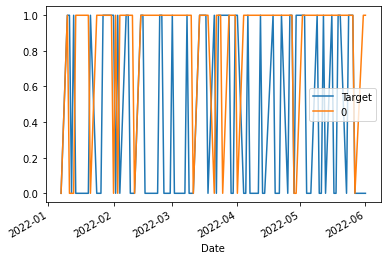

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

Seems to be our model has a bias to prediciting 1.

## 4. Backtesting

We need a more robust way to test the models, not just the last 100 days in our tests. This is because we want to see our models perfoamcne in differnt situations, allowing us to be more confident in the model.

We will begin by creating a prediction function - wrapping everything we did together.

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = pd.Series(model.predict(test[predictors]),
                      index=test.index,
                     name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [25]:
#Our function takes the first 10 years, trains a model and test on the next
# year, then takes the first 11 years, trains and test on th 12th year etc.
# P.S a stocks year is approx 250 days
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = [] # Were we store our dataframes with predictions
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(sp500, model, predictors) #model and predictors from above

In [27]:
predictions

,Target,Predictions
Date,,
1999-11-22,0,0
1999-11-23,1,0
1999-11-24,0,0
1999-11-26,0,0
1999-11-29,0,0
...,...,...
2022-05-25,1,0
2022-05-26,1,1
2022-05-27,0,0


In [29]:
predictions["Predictions"].value_counts()

0    3323
1    2345
Name: Predictions, dtype: int64

In [32]:
precision_score(predictions["Target"], predictions["Predictions"])

0.535181236673774

## 5. Improving Our Model

We can start with adding more predictors. Once interesting things analyst look at is the rolling average price. If this hs been going up alot, maybe the market is due for a downturn.
We can look at differnt time horizons and see if it grew by comapring it to the days close

In [45]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [47]:
sp500 = sp500.dropna()

In [48]:
model = RandomForestClassifier(n_estimators=200, # Number of trees
                               min_samples_split=50, # Avoid overfitting
                              random_state=1)

#We will also adjust our predict function to be more sensitive

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1] # return a probabilty of up (1)
    # Define our threshold
    preds[preds>=0.6] = 1
    preds[preds<0.6] = 0
    preds = pd.Series(model.predict(test[predictors]),
                      index=test.index,
                     name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [49]:
predictions = backtest(sp500, model, new_predictors)

In [50]:
predictions["Predictions"].value_counts()

1    3339
0    1328
Name: Predictions, dtype: int64

In [51]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5570530098831986

In [52]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.548104
0    0.451896
Name: Target, dtype: float64

## 6. Extending the model

-See correlation with other indexes opening before the SP500

-Add Macro economic news

-Adding key sectors

-Adding Sentiments from Headlines

-Increase resolutions (instead of days, hours)